## **1. Import libraries**

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
df = pd.read_csv('Cruzipain_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [5]:
# Examine X dimension
X.shape

(604, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(604, 177)

In [7]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 93%|█████████▎| 39/42 [00:19<00:00,  3.20it/s]

[19:00:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:20<00:00,  2.07it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 93%|█████████▎| 39/42 [00:18<00:00,  3.29it/s]

[19:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:18<00:00,  2.25it/s]


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.93,0.95,0.33,0.04
DecisionTreeRegressor,0.93,0.95,0.33,0.04
ExtraTreesRegressor,0.93,0.95,0.33,1.38
GaussianProcessRegressor,0.93,0.95,0.33,0.51
MLPRegressor,0.86,0.91,0.46,1.09
RandomForestRegressor,0.86,0.91,0.46,0.83
BaggingRegressor,0.81,0.88,0.54,0.11
LGBMRegressor,0.80,0.88,0.55,0.14
HistGradientBoostingRegressor,0.80,0.88,0.55,1.29


In [10]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,2177458074921255839989760.00,-1034292585587596591104000.00,1481956331326.84,0.86
TransformedTargetRegressor,3462952206842885632.00,-1644902298250370816.00,1868890061.46,0.03
LinearRegression,3462952206842885632.00,-1644902298250370816.00,1868890061.46,0.04
Lars,9209.94,-4373.25,96.38,0.09
KernelRidge,31.85,-13.66,5.58,0.03
GaussianProcessRegressor,18.43,-7.28,4.19,0.11
QuantileRegressor,3.29,-0.09,1.52,3.27
LassoLars,3.11,-0.00,1.46,0.03
Lasso,3.11,-0.00,1.46,0.03


## **5. Data visualization of model performance**

[(0.0, 1.0)]

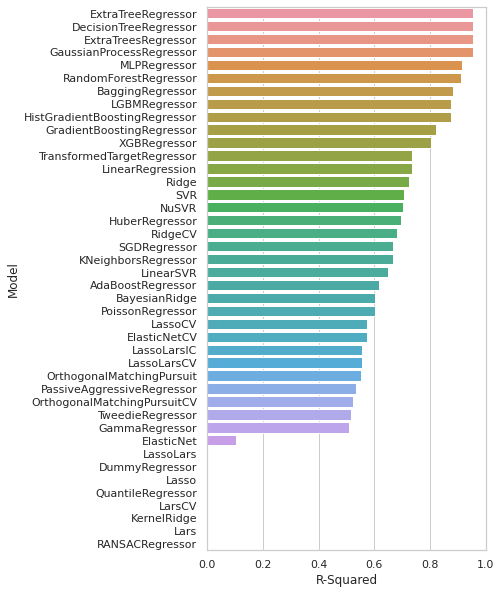

In [11]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

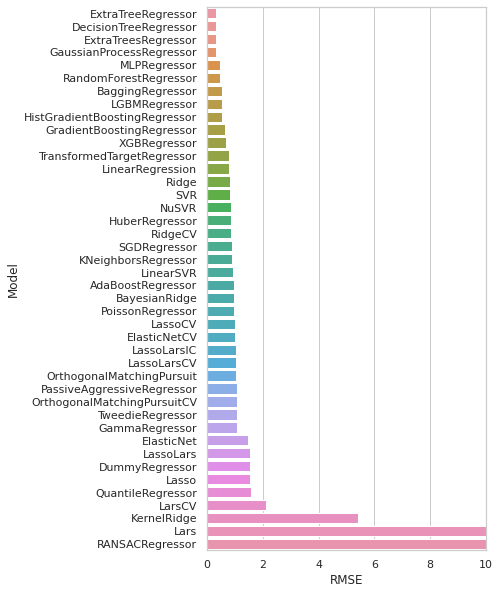

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

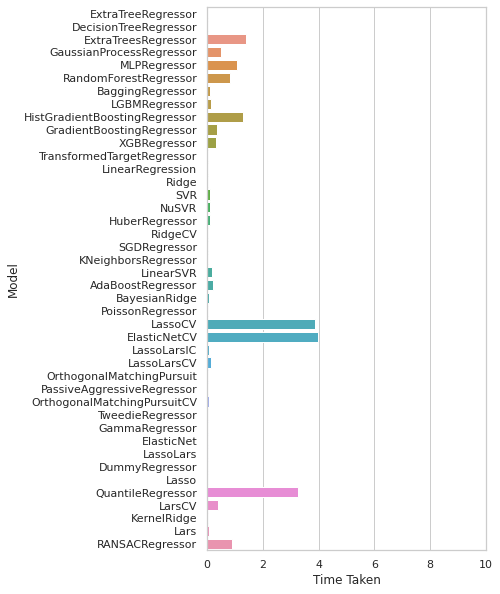

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))